# Shanghai Rankings Unsupervised Machine Learning - Clustering

## 1. Importing libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler # Importing StandardScaler for standardizing data

In [23]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [24]:
# Set path variable

path = r'C:\Users\HP\Documents\CareerFoundry\Data Immersion\Achievement 6\World University Rankings Analysis'

In [25]:
# Import dataset

df_shanghai = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'shanghai_top100.csv'))

## 2. Data Cleaning, Manipulations, and Preprocessing

##### Removing irrelevant columns

In [26]:
# Drop index column

df_shanghai = df_shanghai.drop(columns = ['Unnamed: 0'])

In [27]:
df_shanghai.dtypes

world_rank_Shanghai         int64
university_name            object
national_rank             float64
overall_score_Shanghai    float64
alumni_score              float64
award_score               float64
hici_score                float64
ns_score                  float64
publication_score         float64
pcp_score                 float64
year                        int64
country                    object
dtype: object

In [28]:
# Removing non numerical columns and other irrelveant columns

df_shanghai = df_shanghai.drop(columns = ['university_name', 'national_rank', 'overall_score_Shanghai', 'country'])

##### Missing values

In [29]:
# Check for missing values

df_shanghai.isnull().sum()

world_rank_Shanghai    0
alumni_score           0
award_score            0
hici_score             0
ns_score               0
publication_score      0
pcp_score              0
year                   0
dtype: int64

No missing values and all of the remaining columns are numerical in nature.

##### Duplicates check

In [30]:
# Create a dataframe with just duplicated values

dups = df_shanghai.duplicated()

In [31]:
# Check size of duplicated dataframe

dups.shape 

(1101,)

No duplicates

##### Extreme values checks

In [32]:
df_shanghai.describe()

,world_rank_Shanghai,alumni_score,award_score,hici_score,ns_score,publication_score,pcp_score,year
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,50.306994,25.576658,26.719255,35.376748,32.587103,53.767666,31.522343,2009.989101
std,28.734019,18.650148,22.021721,16.105656,15.019464,12.279979,12.621984,3.163409
min,1.000000,0.000000,0.000000,0.000000,5.600000,19.000000,14.800000,2005.000000
25%,26.000000,14.400000,14.100000,24.100000,21.900000,45.800000,24.500000,2007.000000
50%,50.000000,21.300000,22.200000,32.300000,28.300000,52.400000,28.400000,2010.000000
75%,75.000000,32.900000,34.000000,43.700000,40.500000,62.000000,34.200000,2013.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2015.000000


There don't appear to be any extreme values since the scores are scaled out of 100 based on the top university. 

##### Standardization?

## 3. Elbow technique

In [34]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [35]:
score = [kmeans[i].fit(df_shanghai).score(df_shanghai) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

[-2709876.428119891,
 -1390651.1922307746,
 -900307.4182890158,
 -740475.2165133922,
 -667563.1015109641,
 -598331.1093842885,
 -545724.8330381018,
 -512872.8070181202,
 -473811.8047660319]

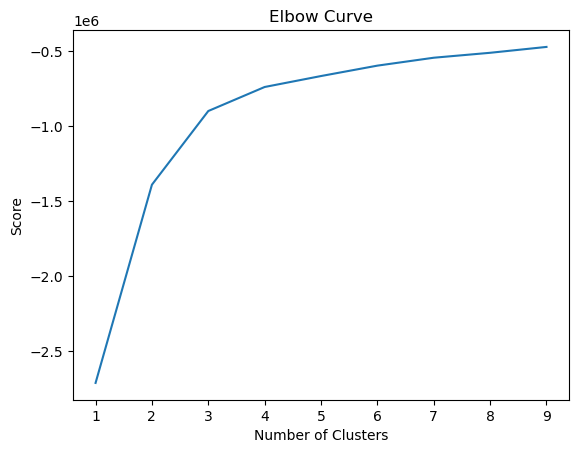

In [36]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 4. Choosing the number of clusters for the k-means algorithm. 

#####  The curve begins to flatten out around 3-4 range so the optimal number of clusters is 3. 

## 5. Run the k-means algorithm.

In [37]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [38]:
# Fit the k-means object to the data.

kmeans.fit(df_shanghai)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=3)

## 6. Attach a new column to the dataframe with the resulting clusters.

In [39]:
# Creating a new column with each cluster value for every row

df_shanghai['clusters'] = kmeans.fit_predict(df_shanghai)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [40]:
df_shanghai.head()

,world_rank_Shanghai,alumni_score,award_score,hici_score,ns_score,publication_score,pcp_score,year,clusters
0,1,100.0,100.0,100.0,100.0,100.0,72.4,2005,2
1,2,99.8,93.4,53.3,56.6,70.9,66.9,2005,2
2,3,41.1,72.2,88.5,70.9,72.3,65.0,2005,2
3,4,71.8,76.0,69.4,73.9,72.2,52.7,2005,2
4,5,74.0,80.6,66.7,65.8,64.3,53.0,2005,2


In [41]:
# Checking the value count of each cluster

df_shanghai['clusters'].value_counts()

0    555
1    419
2    127
Name: clusters, dtype: int64

## 7. Create a few different visualizations using the clustered data to see the results in terms of the clusters

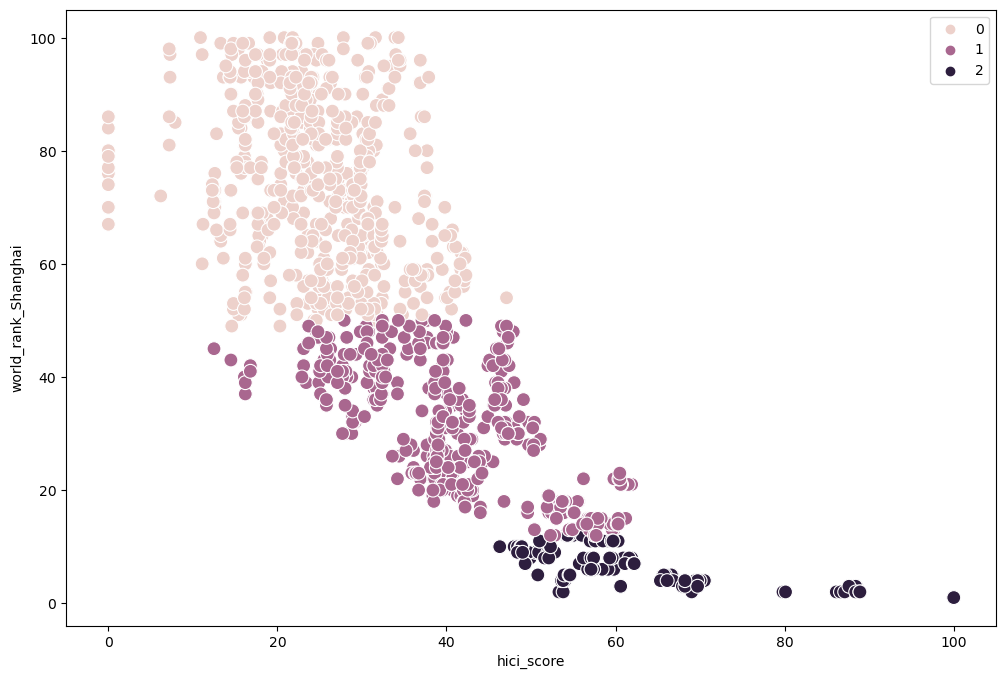

In [43]:
# Plot the clusters for the "Hici_score" and "world_rank_Shanghai" variables based on prior data exploration. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_shanghai['hici_score'], y = df_shanghai['world_rank_Shanghai'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('hici_score') # Label x-axis.
plt.ylabel('world_rank_Shanghai') # Label y-axis.
plt.show()

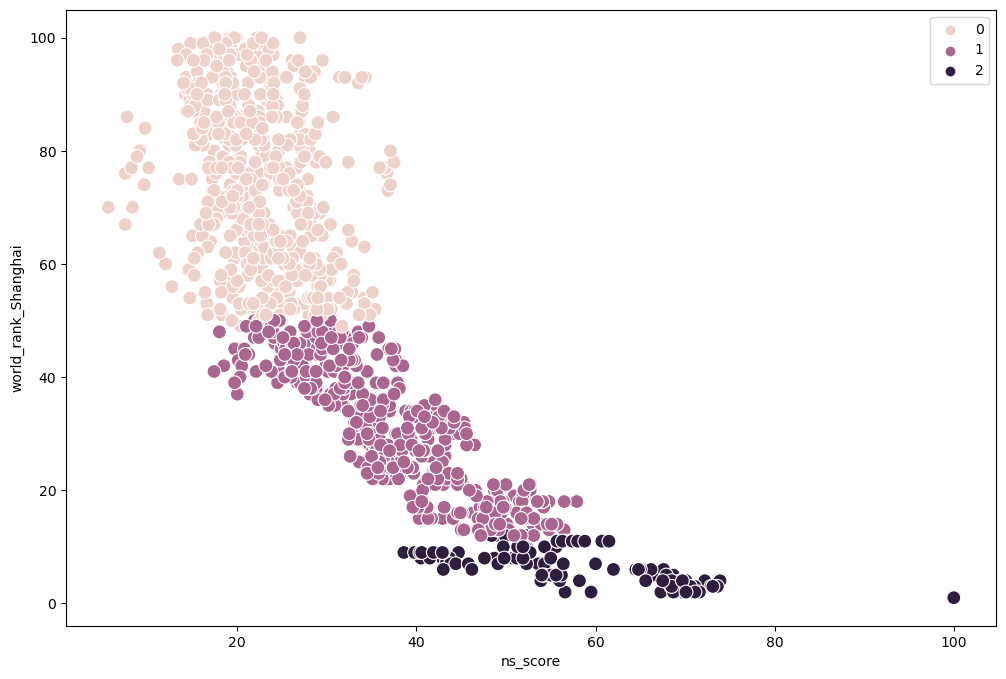

In [44]:
# Plot the clusters for the "ns_score" and "world_rank_Times" variables based on prior data exploration. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_shanghai['ns_score'], y = df_shanghai['world_rank_Shanghai'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ns_score') # Label x-axis.
plt.ylabel('world_rank_Shanghai') # Label y-axis.
plt.show()

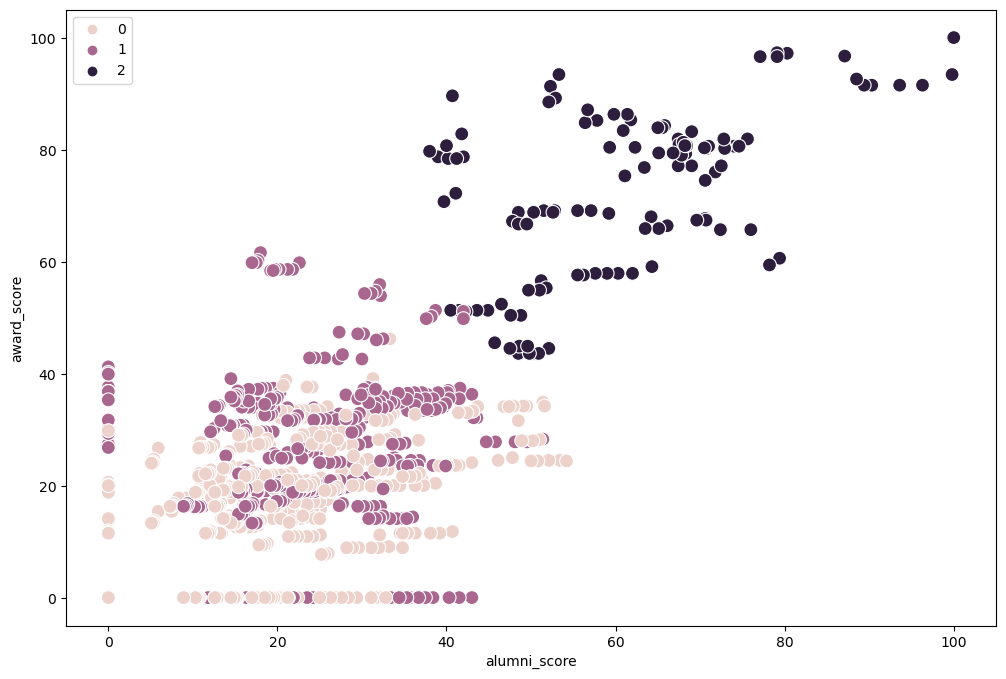

In [45]:
# Plot the clusters for the "alumni_score" and "award_score" variables based on prior data exploration. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_shanghai['alumni_score'], y = df_shanghai['award_score'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('alumni_score') # Label x-axis.
plt.ylabel('award_score') # Label y-axis.
plt.show()

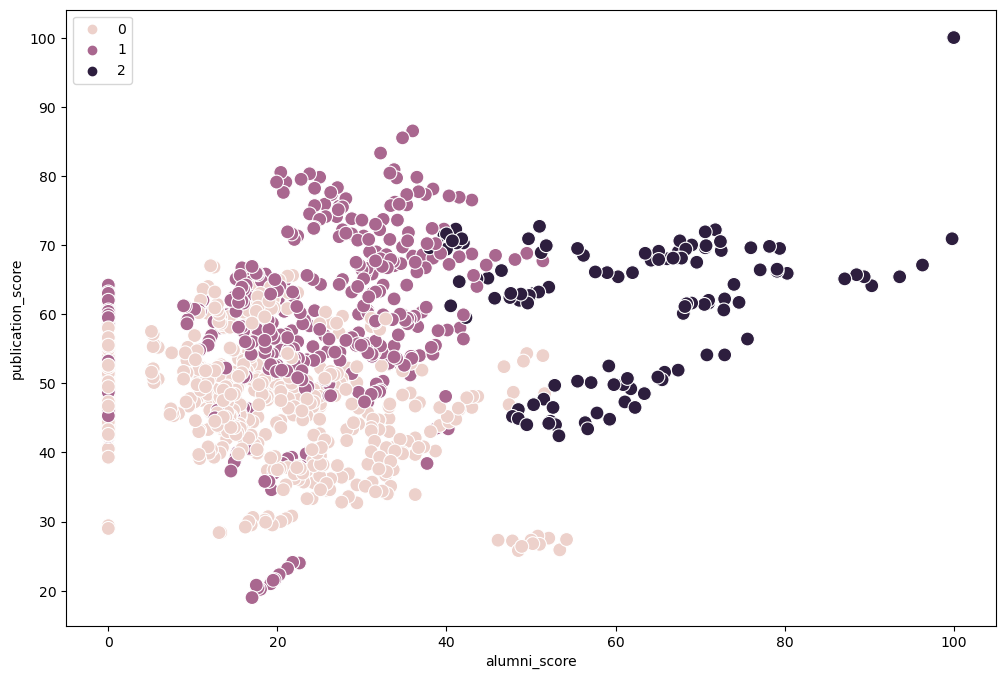

In [48]:
# Plot the clusters for the "alumni_score" and "publication_score" variables based on prior data exploration. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_shanghai['alumni_score'], y = df_shanghai['publication_score'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('alumni_score') # Label x-axis.
plt.ylabel('publication_score') # Label y-axis.
plt.show()

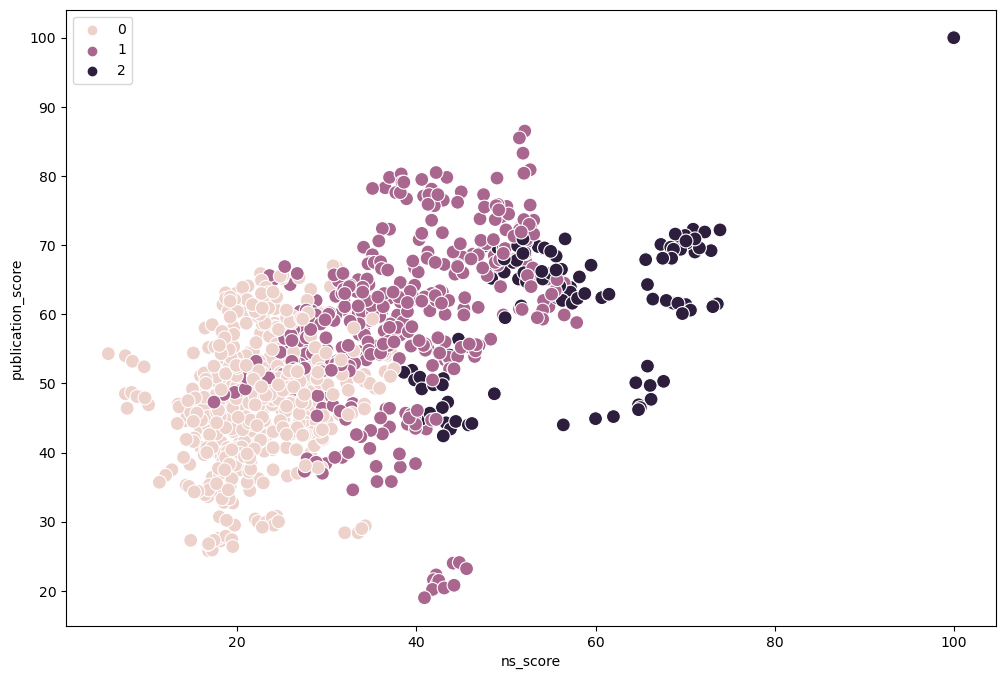

In [59]:
# Plot the clusters for the "ns_score" and "publication_score" variables based on prior data exploration. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_shanghai['ns_score'], y = df_shanghai['publication_score'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ns_score') # Label x-axis.
plt.ylabel('publication_score') # Label y-axis.
plt.show()

## 8. Discuss how and why the clusters make sense. If they don't make sense, explain why you'll need to explore the data further.

Compared to the CWUR dataset, the clusters here make much more sense. Even though the amount of datapoints is roughly the same, the combination of the smaller number of clusters and having less variation in data make the clusters group much more cleanly. 

In general, the clusters are grouped into 3 tiers of universities: top universities (cluster 2/black), middle universities (cluster 1/pink), and bottom universities (cluster 0/pale). In general, the top universities have high scores in the 5 available categories (alumni, award, hici, ns, and publication scores) whereas the bottom universities tended to have lower scores. Note that because these scales are scaled and based off the top university per year, there is often a significant gap between the scores for the top university and the second best university. Unlike the Times dataset, the top university in this rankings dataset always has perfect scores in every category but realistically that should not be the case as no university is perfect. 

Another interesting thing to note is that there are many universities that may have a high world ranking but do not have a very high score in certain factors. NS scores in particular were not very high for many universities (many had ns scores below 60 and were rivaled by some universities in cluster 1).

## 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your finds.

In [60]:
df_shanghai.groupby('clusters').agg({'world_rank_Shanghai':['mean', 'median'], 
                                     'alumni_score':['mean', 'median'], 
                                     'award_score':['mean', 'median'],
                                     'hici_score':['mean', 'median'],
                                     'ns_score':['mean', 'median'],
                                     'publication_score':['mean', 'median']})

world_rank_Shanghai        alumni_score        award_score         \
                        mean median         mean median        mean median   
clusters                                                                     
0                  74.976577   75.0    18.797658   17.3   15.720541   17.1   
1                  30.978520   31.0    22.833413   22.6   26.682339   29.2   
2                   6.267717    6.0    64.251969   63.4   74.906299   78.7   

         hici_score          ns_score        publication_score         
               mean median       mean median              mean median  
clusters                                                               
0         24.669910   24.6  22.466667   22.3         47.544505   47.8  
1         41.024821   40.2  37.400716   36.9         58.689976   59.2  
2         63.532283   57.6  60.933071   56.6         64.723622   65.4

As stated in step 8, cluster 2 (black) has the best overall world rankings and also the highest average score for all factors. Cluster 1 (pink) is composed of middle universities and cluster 0 (pale) has the worst average world rankings. There is a significant difference in average world rankings between the clusters.

Unlike the Times dataset, the difference in scores for each factor between cluster 2 and cluster 1 is fairly significant. The exception for this is the publication score factor, where all 3 clusters have an average score that is must closely compared to the other factors (alumni score and award score in particular). Another thing to note is that the alumni score between clusters 0 and 1 is quite close, which may be because both middle and bottom universities did not have much difference in ability to attract important staff and faculty. 

The statistics for these clusters are much more controlled due to less variation in the data compared to the CWUR dataset. One thing to note is that clusters 0 and 1 are roughly the same size but cluster 2 has significantly less datapoints, which could be why their statistics are so different compared to the others. 

## 10. Propose what these results could be useful for in future steps of an analytics pipeline. 

The results for each cluster could be combined with a time series analysis to predict future values such as world rankings and scores for certain factors. The results could also be combined with geographic data to see how cluster scores vary by region as well. 